In [130]:
# !pip install tensorflow

In [131]:
import tensorflow as tf
tf.__version__

'2.11.0'

In [132]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

In [133]:
data_set = np.loadtxt('./data/ThoraricSurgery3.csv', delimiter=",")
X=data_set[:,0:16]
y=data_set[:,16]

In [134]:
model=Sequential() #모델생성 
model.add(Dense(30, activation='relu', input_dim=16)) # 30개의 입력으로 ���기화 1층추가 30x16 +30=510
model.add(Dense(1, activation='sigmoid')) # 1개의 입력으로 ���기화 1�� 30x1+1=31
# model.summary()

In [135]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, y,epochs=5, batch_size=10) #loss는 적을수록 accuracy는 클수록

Epoch 1/5
47/47 [==============================] - 1s 3ms/step - loss: 11.8686 - accuracy: 0.1596
Epoch 2/5
47/47 [==============================] - 0s 2ms/step - loss: 0.8281 - accuracy: 0.7106
Epoch 3/5
47/47 [==============================] - 0s 1ms/step - loss: 0.4849 - accuracy: 0.8511
Epoch 4/5
47/47 [==============================] - 0s 2ms/step - loss: 0.4705 - accuracy: 0.8511
Epoch 5/5
47/47 [==============================] - 0s 2ms/step - loss: 0.4613 - accuracy: 0.8511


최소제곱법으로 단순선형회귀분석 모델 설정

In [136]:
import numpy as np
x=np.array([2,4,6,8])
y=np.array([81,93,91,97])
mx=np.mean(x)
my=np.mean(y)
print(f'x의 평균값{mx}   y의 평균값{my}')

x의 평균값5.0   y의 평균값90.5


In [137]:
#기울기 공식 합((x-x의평균)(y-y의평균))/합((x-x의평균)^2)
divisor=sum([(i-mx)**2 for i in x])

top=0
for i in range(len(x)):
    top+=(x[i]-mx)*(y[i]-my)
a=top/divisor

print('기울기\t',a)
b=my-a*mx
print('절편\t',b)

기울기	 2.3
절편	 79.0


[83.6, 88.2, 92.8, 97.4]


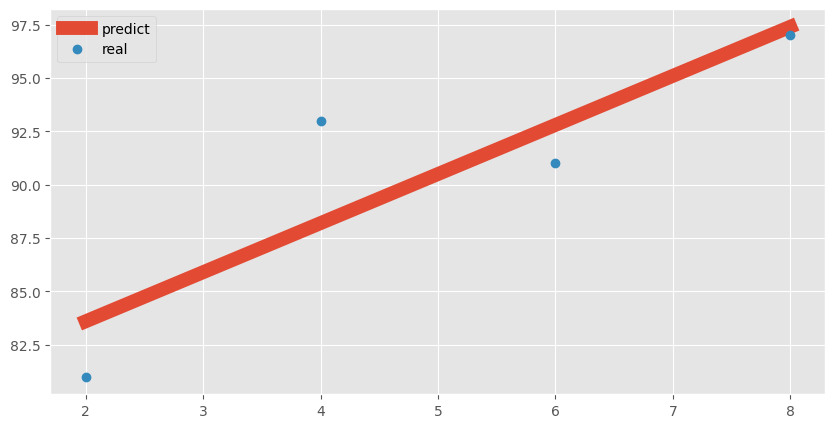

In [143]:

pred_y=[a*i+b for i in x]
print(pred_y)
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.plot(x,pred_y,linewidth=10)
plt.plot(x,y,'o')
plt.legend(['predict','real'])
plt.show()

In [139]:
#평균 제곱 오차 (MSE)구함
#기울기와 절편에 임의의 초기 값 설정
fake_a=3
fake_b=76
x=np.array([2,4,6,8])
y=np.array([81,93,91,97])
def predict(x):
    return x*fake_a+fake_b
predict_result=[predict(i) for i in x] #predict_result 
print(predict_result)
mse_result1=sum([(y[i]-predict_result[i])**2 for i in range(len(y))])/len(y)
mse_result2=np.mean((predict_result-y)**2)
print(mse_result1,mse_result2)

[82, 88, 94, 100]
11.0 11.0


In [144]:

for x_value,y_value,y_predict in zip(x,y,predict_result):
    print(x_value,y_value,y_predict)

2 81 82
4 93 88
6 91 94
8 97 100


epochs: 0 기울기: 27.84 절편: 5.43
epochs: 100 기울기: 7.073858435872394 절편: 50.51166161138297
epochs: 200 기울기: 4.095999380762421 절편: 68.28224379060177
epochs: 300 기울기: 2.9756829100119027 절편: 74.96781336233505
epochs: 400 기울기: 2.5542024233262106 절편: 77.48302865233052
epochs: 500 기울기: 2.3956349066513707 절편: 78.42929177728175
epochs: 600 기울기: 2.3359793398132864 절편: 78.78529068727728
epochs: 700 기울기: 2.313535987420573 절편: 78.91922301600925
epochs: 800 기울기: 2.3050924490666174 절편: 78.96961044185792
epochs: 900 기울기: 2.3019158585694823 절편: 78.98856697541248
epochs: 1000 기울기: 2.3007207758016315 절편: 78.99569871827002
epochs: 1100 기울기: 2.300271167070735 절편: 78.99838179089187
epochs: 1200 기울기: 2.3001020172709508 절편: 78.9993912045567
epochs: 1300 기울기: 2.300038380484562 절편: 78.99977096168232
epochs: 1400 기울기: 2.3000144393354365 절편: 78.9999138322214
epochs: 1500 기울기: 2.3000054323026444 절편: 78.99996758234106
epochs: 1600 기울기: 2.300002043716771 절편: 78.99998780397235
epochs: 1700 기울기: 2.3000007688780433 절편: 78

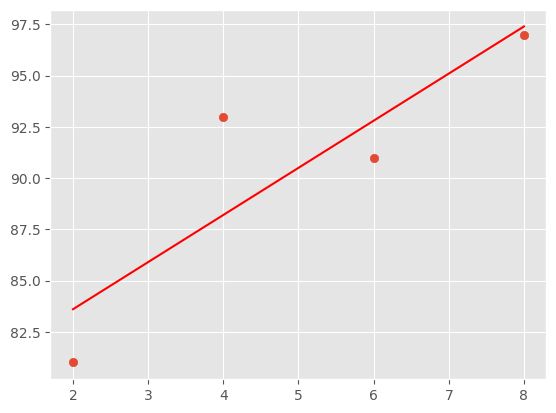

In [158]:
#경사 하강법으로 a와 b를 검색 : mse가 최소가 되도록
x=np.array([2,4,6,8])
y=np.array([81,93,91,97])
a=0;b=0
lr=0.03
epochs=2001
n=len(x)

for i in range(epochs):
    y_pred=a*x+b #예측값 구함
    error=y-y_pred #실제값과 예측값 차이구함
    
    a_diff=(2/n)*sum((-x*error)) # a로 편미분
    b_diff=(2/n)*sum((-error))
    
    a=a-lr*a_diff #다음에 적용할 a값 수정정
    b=b-lr*b_diff
    
    if i %100 == 0:
        print('epochs:',i,'기울기:',a,'절편:',b)
# 최종 a와 b를 
y_pred=a*x+b 

plt.scatter(x,y)
plt.plot(x,y_pred,'r')
plt.show()


In [162]:
from keras.optimizers import Adam
model = Sequential()
model.add(Dense(1, input_dim=1))
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.1))

# 모델 학습: epochs는 전체 데이터셋에 대해 경사 하강법을 수행하는 횟수
model.fit(x, y, epochs=1000)

# 예측값 계산
y_pred = model.predict(x)

print('예측값:', y_pred.flatten())

Epoch 1/1000


c:\Users\hunmi\anaconda3\envs\py3.8\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 0s 320ms/step - loss: 9379.4893
Epoch 2/1000
1/1 [==============================] - 0s 9ms/step - loss: 9260.6152
Epoch 3/1000
1/1 [==============================] - 0s 6ms/step - loss: 9142.5840
Epoch 4/1000
1/1 [==============================] - 0s 7ms/step - loss: 9025.4082
Epoch 5/1000
1/1 [==============================] - 0s 7ms/step - loss: 8909.1016
Epoch 6/1000
1/1 [==============================] - 0s 7ms/step - loss: 8793.6797
Epoch 7/1000
1/1 [==============================] - 0s 6ms/step - loss: 8679.1523
Epoch 8/1000
1/1 [==============================] - 0s 5ms/step - loss: 8565.5342
Epoch 9/1000
1/1 [==============================] - 0s 7ms/step - loss: 8452.8379
Epoch 10/1000
1/1 [==============================] - 0s 4ms/step - loss: 8341.0742
Epoch 11/1000
1/1 [==============================] - 0s 6ms/step - loss: 8230.2539
Epoch 12/1000
1/1 [==============================] - 0s 7ms/step - loss: 8120.3877
Epoch 13/1000
1/1 [=====